In [1]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.3MB 68kB/s 
     |████████████████████████████████| 204kB 37.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=8f783b2f5b088b6a7f0c87ea184f6fb940b59d2cbcd056469ed6790c80de5685
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 36.5 MB of archives.
After this 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import python_utils



In [6]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [7]:
grocery_food = spark.read.json("/content/drive/MyDrive/big_dta/project/Grocery_and_Gourmet_Food.json.gz")
meta_data = spark.read.json("/content/drive/MyDrive/big_dta/project/meta_Grocery_and_Gourmet_Food.json.gz")

In [8]:
all_data = grocery_food.join(meta_data, ['asin'])
all_data.show()

+----------+-----+-------+--------------------+-----------+--------------+---------------+-----+--------------------+--------------+--------+----+--------------------+--------------------+--------------------+--------------------+----+--------------------+--------------------+-------+---+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|style|             summary|unixReviewTime|verified|vote|            also_buy|           also_view|               brand|            category|date|         description|             details|feature|fit|               image|main_cat| price|                rank|similar_item|tech1|tech2|               title|
+----------+-----+-------+--------------------+-----------+--------------+---------------+-----+--------------------+--------------+--------+----+--------------------+--------------------+--------------------+---

In [9]:
grocery_food.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Display Height:: string (nullable = true)
 |    |-- Edition:: string (nullable = true)
 |    |-- Flavor Name:: string (nullable = true)
 |    |-- Flavor:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Weight:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Material Type:: string (nullable = true)
 |    |-- Material:: string (nullable = true)
 |    |-- Number of Items:: string (nullable = true)
 |    |-- Package Quantity:: string (nulla

In [10]:
meta_data.printSchema()

root
 |-- also_buy: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- also_view: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: string (nullable = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: struct (nullable = true)
 |    |-- 
    Item Weight: 
    : string (nullable = true)
 |    |-- 
    Product Dimensions: 
    : string (nullable = true)
 |    |--  Date first listed on Amazon:: string (nullable = true)
 |    |--  UNSPSC Code:: string (nullable = true)
 |    |-- ASIN:: string (nullable = true)
 |    |-- ASIN: : string (nullable = true)
 |    |-- Audio CD: string (nullable = true)
 |    |-- Batteries: string (nullable = true)
 |    |-- Discontinued by manufacturer:: string (nullable = true)
 |    |-- 

In [11]:
grocery_food.take(1)

[Row(asin='1888861614', image=None, overall=5.0, reviewText='Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', reviewTime='06 4, 2013', reviewerID='ALP49FBWT4I7V', reviewerName='Lori', style=None, summary='Love it', unixReviewTime=1370304000, verified=True, vote=None)]

In [12]:
grocery_food.show()

+----------+-----+-------+--------------------+-----------+--------------+-------------------+-----+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|       reviewerName|style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+-------------------+-----+--------------------+--------------+--------+----+
|1888861614| null|    5.0|Very pleased with...| 06 4, 2013| ALP49FBWT4I7V|               Lori| null|             Love it|    1370304000|    true|null|
|1888861614| null|    4.0|Very nicely craft...|05 23, 2014|A1KPIZOCLB9FZ8|         BK Shopper| null|      Nice but small|    1400803200|    true|null|
|1888861614| null|    4.0|still very pretty...| 05 9, 2014|A2W0FA06IYAYQE|     daninethequeen| null|the "s" looks lik...|    1399593600|    true|null|
|1888861614| null|    5.0|I got this for ou...|04 20, 2014|A2PTZTCH2QUYBC|            Tammara|

In [13]:
print("In total there are {0} reviews".format(grocery_food.count()))

In total there are 5074160 reviews


In [17]:
grocery_food = grocery_food.filter(grocery_food.reviewText != '')
#grocery_food = grocery_food.filter(grocery_food.summary != '')

TypeError: ignored

In [ ]:
drop_list = ['image', 'verified', 'vote', 'reviewTime', 'reviewerID', 'reviewerName', 'style', 'unixReviewTime']
grocery_food = grocery_food.select([column for column in grocery_food.columns if column not in drop_list])
grocery_food.show(5)

### Group by stars and view

In [ ]:
grocery_food.groupBy("overall").count().sort(desc("count")).show()

In [ ]:
grocery_food.registerTempTable("grocery_food")

query = """
SELECT overall, count(*) as star_count
FROM grocery_food
GROUP BY overall
ORDER BY star_count DESC
"""

star_counts = spark.sql(query)
star_counts.show()

In [ ]:
star_count_pd = star_counts.toPandas()
star_count_pd.head()
star_count_pd = star_count_pd.sort_values('overall')

In [ ]:
pl = star_count_pd.plot(kind="bar", 
                            x="overall", y="star_count", 
                            figsize=(10, 7), log=False, alpha=0.5, color="darkred")
pl.set_xlabel("Review")
pl.set_ylabel("Count by Review")
pl.set_title("Number of reviews by star rating")

In [ ]:
#total number of foods that were reviewed in the dataset
grocery_food.groupBy("asin").count().sort(desc("count")).count()

### Text Analysis

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
tokenizer = Tokenizer().setInputCol('reviewText').setOutputCol('words')

In [ ]:
tokenizer.transform(grocery_food).show()

In [ ]:
# import requests
# stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
# from pyspark.ml.feature import StopWordsRemover
# sw_filter = StopWordsRemover()\
#   .setStopWords(stop_words)\
#   .setCaseSensitive(False)\
#   .setInputCol("words")\
#   .setOutputCol("filtered")

# stop_words[0:10]


In [ ]:
from pyspark.ml.feature import NGram
#ngram = NGram(n=2, inputCol="words", outputCol="ngrams")

In [ ]:
from pyspark.ml.feature import CountVectorizer

In [ ]:
count_vectorizer_estimator = CountVectorizer().setInputCol('words').setOutputCol('features')

In [ ]:
#count_vectorizer_transformer = count_vectorizer_estimator.fit(tokenizer.transform(grocery_food))

In [ ]:
#count_vectorizer_transformer.transform(tokenizer.transform(grocery_food)).show(truncate=True)

In [ ]:
#count_vectorizer_transformer.vocabulary

### Put into Pipeline

In [102]:
from pyspark.ml import Pipeline

In [103]:
pipeline_cv_estimator = Pipeline(stages=[tokenizer, count_vectorizer_estimator])

In [104]:
pipeline_cv_transformer = pipeline_cv_estimator.fit(grocery_food)

KeyboardInterrupt: ignored

In [92]:
dataset = pipeline_cv_transformer.transform(grocery_food)

### Predict Rating

In [35]:
dataset = dataset.sampleBy("overall", fractions={1: 0.542, 2: 1, 3: 0.681, 4: 0.397, 5: 0.0614}, seed=10)

In [36]:
dataframe_new = pyspark.sql.DataFrame.sample(dataset, .01, seed=None)

In [37]:
dataframe_new.groupBy("overall").count().sort(desc("count")).show()

+-------+-----+
|overall|count|
+-------+-----+
|    5.0| 2187|
|    1.0| 2183|
|    4.0| 2180|
|    2.0| 2156|
|    3.0| 2148|
+-------+-----+



In [38]:
(trainingData, testData) = dataframe_new.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 7634
Test Dataset Count: 3220


In [39]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='overall',featuresCol='features', maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.filter(predictions['prediction'] == 1.0) \
    .select("reviewText","overall","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-------+------------------------------+----------+
|                    reviewText|overall|                   probability|prediction|
+------------------------------+-------+------------------------------+----------+
|Every single one is broken....|    1.0|[1.3013950076452212E-4,0.21...|       1.0|
|The peanut bar is too hard ...|    1.0|[1.299864524279638E-4,0.215...|       1.0|
|I should have looked at the...|    2.0|[1.2997823983227114E-4,0.22...|       1.0|
|                  Too small :(|    3.0|[1.2994937496152377E-4,0.23...|       1.0|
|I like to mix it with my pr...|    4.0|[1.298925856782409E-4,0.212...|       1.0|
|                         Stale|    1.0|[1.29888338242474E-4,0.2209...|       1.0|
|These seeds had poor germin...|    2.0|[1.298481689903996E-4,0.218...|       1.0|
|              Coffee was stale|    2.0|[1.297697653164048E-4,0.224...|       1.0|
|My Keurig machine rejected ...|    1.0|[1.2973400298082026E-4,0.22...|       1.0|
|My 

In [40]:
predictions.write.json("/content/drive/MyDrive/big_dta/project/predictions_lr1")

AnalysisException: ignored

In [41]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='overall', predictionCol="prediction")
evaluator.evaluate(predictions)

0.3952925329142201

In [42]:
import pyspark.sql.functions as F
pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))


In [43]:
pred_grouped.take(1)

[Row(asin='B00005IX97', overall=2.0, reviewText="Hard to find I.S.E. pods for our older machine. Everything now days is geared toward K cups, etc. Bought this due to some of reviews, but needless to say everyone's tastes is different. We wanted true espresso flavor like from Italian Roast. This tastes like coffee with a little choco taste, not strong or any bite at all. For the price if you just want better than regular brew it is ok.", summary='Not Espresso taste', words=['hard', 'to', 'find', 'i.s.e.', 'pods', 'for', 'our', 'older', 'machine.', 'everything', 'now', 'days', 'is', 'geared', 'toward', 'k', 'cups,', 'etc.', 'bought', 'this', 'due', 'to', 'some', 'of', 'reviews,', 'but', 'needless', 'to', 'say', "everyone's", 'tastes', 'is', 'different.', 'we', 'wanted', 'true', 'espresso', 'flavor', 'like', 'from', 'italian', 'roast.', 'this', 'tastes', 'like', 'coffee', 'with', 'a', 'little', 'choco', 'taste,', 'not', 'strong', 'or', 'any', 'bite', 'at', 'all.', 'for', 'the', 'price', '

In [44]:
pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]
#make 3 negative or ignore 3

0.7506211180124224

In [45]:
trainingSummary = lrModel.summary

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
print(accuracy, falsePositiveRate, truePositiveRate)

0.9197013361278491 0.020245032510402564 0.9197013361278491


In [46]:
dataframe_new.show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|            features|
+----------+-------+--------------------+--------------------+--------------------+--------------------+
|4639725183|    5.0|Love the tea. The...|           Great tea|[love, the, tea.,...|(262144,[0,9,30,4...|
|5463213682|    4.0|  Excelente  product|          Four Stars|[excelente, , pro...|(262144,[4,45,966...|
|9742356831|    5.0|This green curry ...|This green curry ...|[this, green, cur...|(262144,[0,1,2,3,...|
|B00005IX97|    2.0|Hard to find I.S....|  Not Espresso taste|[hard, to, find, ...|(262144,[0,3,5,6,...|
|B00006BN4U|    5.0|Great product Lov...|       Great product|[great, product, ...|(262144,[0,1,2,3,...|
|B00006FMLY|    2.0|This is what it s...|Buy somewhere els...|[this, is, what, ...|(262144,[0,1,2,3,...|
|B00006IDK9|    2.0|Tasted great but ...|           Two

In [47]:
# #use tf-idf
# from pyspark.ml.feature import HashingTF, IDF
# hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
# idf = IDF(inputCol="rawFeatures", outputCol="features_new", minDocFreq=5) #minDocFreq: remove sparse terms
# pipeline = Pipeline(stages=[tokenizer, hashingTF, idf])
# pipelineFit = pipeline.fit(grocery_food)
# dataset = pipelineFit.transform(grocery_food)
# (trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
# lr = LogisticRegression(labelCol='overall',featuresCol='features_new',maxIter=20, regParam=0.3, elasticNetParam=0)
# lrModel = lr.fit(trainingData)
# predictions = lrModel.transform(testData)


In [48]:
# predictions.filter(predictions['prediction'] == 1.0) \
#     .select("overall","reviewText","probability","prediction") \
#     .orderBy("probability", ascending=False) \
#     .show(n = 10, truncate = 30)

In [49]:
# pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))

In [50]:
# pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]

In [78]:
tokenizer = Tokenizer().setInputCol('summary').setOutputCol('words')
count_vectorizer_estimator = CountVectorizer().setInputCol('words').setOutputCol('features')
pipeline_cv_estimator = Pipeline(stages=[tokenizer, count_vectorizer_estimator])
pipeline_cv_transformer = pipeline_cv_estimator.fit(grocery_food)
dataset = pipeline_cv_transformer.transform(grocery_food)
dataset = dataset.sampleBy("overall", fractions={1: 0.542, 2: 1, 3: 0.681, 4: 0.397, 5: 0.0614}, seed=10)
dataframe_new = pyspark.sql.DataFrame.sample(dataset, .01, seed=None)
(trainingData, testData) = dataframe_new.randomSplit([0.7, 0.3], seed = 100)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='overall',featuresCol='features', maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.filter(predictions['prediction'] == 1.0) \
    .select("reviewText","overall","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)
evaluator = MulticlassClassificationEvaluator(labelCol='overall', predictionCol="prediction")
evaluator.evaluate(predictions)

Py4JJavaError: ignored

### Random Forest

In [53]:
dataset = pipeline_cv_transformer.transform(grocery_food)

In [54]:
dataset = dataset.sampleBy("overall", fractions={1: 0.542, 2: 1, 3: 0.681, 4: 0.397, 5: 0.0614}, seed=10)

In [55]:
dataframe_new = pyspark.sql.DataFrame.sample(dataset, .01, seed=None)

In [56]:
dataframe_new.show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|            features|
+----------+-------+--------------------+--------------------+--------------------+--------------------+
|9742356831|    2.0|Super hot and not...|Meeh - it's too s...|[super, hot, and,...|(262144,[1,2,14,1...|
|B00005BPQ9|    2.0|               Stale|           Two Stars|             [stale]|(262144,[769],[1.0])|
|B00006BN4U|    2.0|Even in the over ...|Low Rate and Just...|[even, in, the, o...|(262144,[0,1,2,3,...|
|B00006FMLY|    4.0|                Good|          Four Stars|              [good]| (262144,[27],[1.0])|
|B00008RCN8|    2.0|Received Peppermi...|Wrong flavor deli...|[received, pepper...|(262144,[0,5,8,13...|
|B00008RCN8|    2.0|Orbit is usually ...|and is also usual...|[orbit, is, usual...|(262144,[2,3,9,12...|
|B0000A1OEF|    1.0|They make cupcake...|            On

In [59]:
dataframe_new.groupBy("overall").count().sort(desc("count")).show()

KeyboardInterrupt: ignored

In [ ]:
(trainingData, testData) = dataframe_new.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="overall", \
                            featuresCol="features")
# Train model with Training Data
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
predictions.filter(predictions['prediction'] == 5.0) \
    .select("reviewText","overall","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

In [ ]:
predictions.write.json("/content/drive/MyDrive/big_dta/project/predictions_rf")

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='overall', predictionCol="prediction")
evaluator.evaluate(predictions)

In [ ]:
pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))

In [ ]:
pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]

In [ ]:
pred_grouped.show()

### Sentiment Analysis

In [60]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType


In [61]:
from pyspark.sql.types import FloatType

from textblob import TextBlob

def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

sentiment_analysis_udf = udf(sentiment_analysis , FloatType())

In [62]:
pred_grouped = pred_grouped.withColumn("sentiment_score", sentiment_analysis_udf(pred_grouped['reviewText']))

In [63]:
def condition(r):
    if (r >0):
        label = "positive"
    elif(r <= 0):
        label = "negative"
    return label

sentiment_udf = udf(lambda x: condition(x), StringType())

In [64]:
pred_grouped.withColumn("sentiment", sentiment_udf(pred_grouped['sentiment_score'] )).show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+---------------+---------+
|      asin|overall|          reviewText|             summary|               words|            features|       rawPrediction|         probability|prediction|flag|sentiment_score|sentiment|
+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+---------------+---------+
|B00005IX97|    2.0|Hard to find I.S....|  Not Espresso taste|[hard, to, find, ...|(262144,[0,3,5,6,...|[-6.1203947420993...|[9.89797637855141...|       3.0|   1|    0.016319444| positive|
|B0000CDE88|    5.0|I received a pack...|           Delicious|[i, received, a, ...|(262144,[0,1,2,3,...|[-6.1273146616117...|[9.88186499593824...|       4.0|   1|     0.16001984| positive|
|B0000CFH7B|    1.0|Very thing mist i...|            On

In [72]:
def condition(r):
    if (r >0.1):
        label = "positive"
    elif(r <= -0.1):
        label = "negative"
    else:
        label = "neutral"
    return label

sentiment_udf = udf(lambda x: condition(x), StringType())

In [73]:
pred_grouped = pred_grouped.withColumn("sentiment", sentiment_udf(pred_grouped['sentiment_score'] ))

In [74]:
pred_grouped.groupBy("sentiment").count().sort(desc("count")).show()

+---------+-----+
|sentiment|count|
+---------+-----+
| positive| 1873|
|  neutral|  871|
| negative|  476|
+---------+-----+



In [75]:
pred_grouped.registerTempTable("pred_grouped")

query = """
SELECT sentiment, count(*) as sent_count
FROM pred_grouped
GROUP BY sentiment
ORDER BY sent_count DESC
"""

sent_count = spark.sql(query)
sent_count.show()

+---------+----------+
|sentiment|sent_count|
+---------+----------+
| positive|      1873|
|  neutral|       871|
| negative|       476|
+---------+----------+



In [76]:
sent_count_pd = sent_count.toPandas()
sent_count_pd.head()


,sentiment,sent_count
0,positive,1873
1,neutral,871
2,negative,476


Text(0.5, 1.0, 'Number of reviews by sentiment')

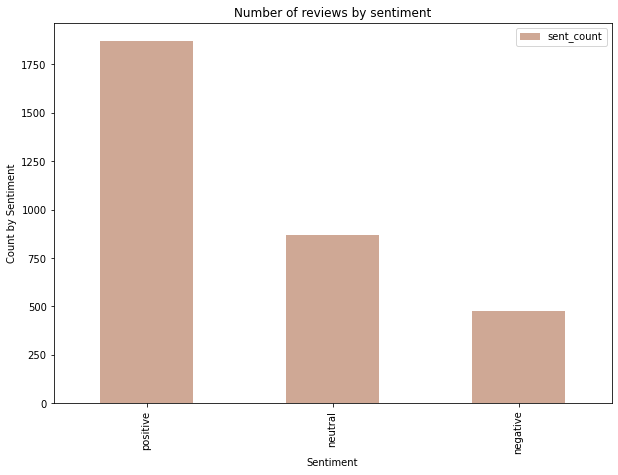

In [106]:
pl = sent_count_pd.plot(kind="bar", 
                            x="sentiment", y="sent_count", 
                            figsize=(10, 7), log=False, alpha=0.5, color="darkred")
pl.set_xlabel("Sentiment")
pl.set_ylabel("Count by Sentiment")
pl.set_title("Number of reviews by sentiment")